# Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing dataset
df=pd.read_csv(r'C:\Users\anand\ibm-hr-analytics-employee-attrition-performance.zip')

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
#shape of dataset
df.shape

(1470, 35)

It contains 1470 rows and 35 columns

In [5]:
#checking for columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Here 26 columns are of int64 and 9 columns are of object datatype

In [7]:
#checking for datatypes of all columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#checking for duplicate values
df.duplicated().sum()

0

There are no duplicate values

# Checking for null values

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

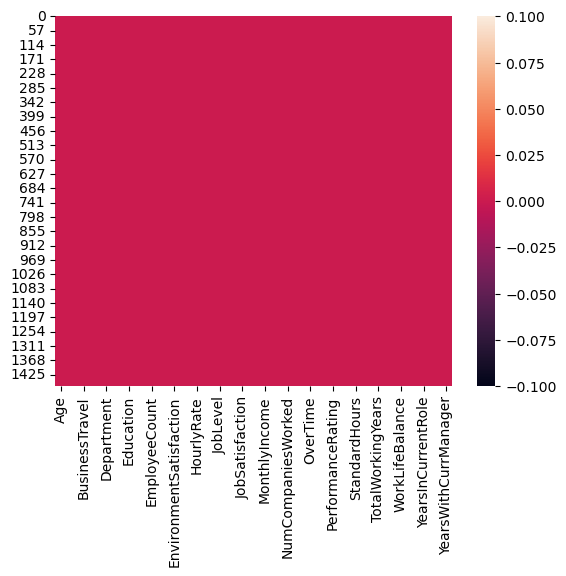

In [10]:
sns.heatmap(df.isnull())

There are no null values are there in dataset.

In [11]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("_____________________________________________________________________________________________")

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
_____________________________________________________________________________________________
Attrition
No     1233
Yes     237
Name: count, dtype: int64
_____________________________________________________________________________________________
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
_____________________________________________________________________________________________
DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Na

In 'Attrition' We have two categories in the columns, i.e. 'Yes' and 'No'.Data is imbalanced. The employee count is found to be 1470 where all the employees should be over 18. There are three categories in the Bussiness travel column. i.e. 'Travel_Rarely','Travel_Frequently','Non-Travel'. There are three unique categories in the column 'Department'. There are 5 different job level and 9 different job roles in the dataset.

In [12]:
#seperating categorical and numerical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] =='object':
        cat_col.append(i)
print("Categorical column :",cat_col)
print("\n")
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('Numerical column :',num_col)


Categorical column : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Numerical column : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


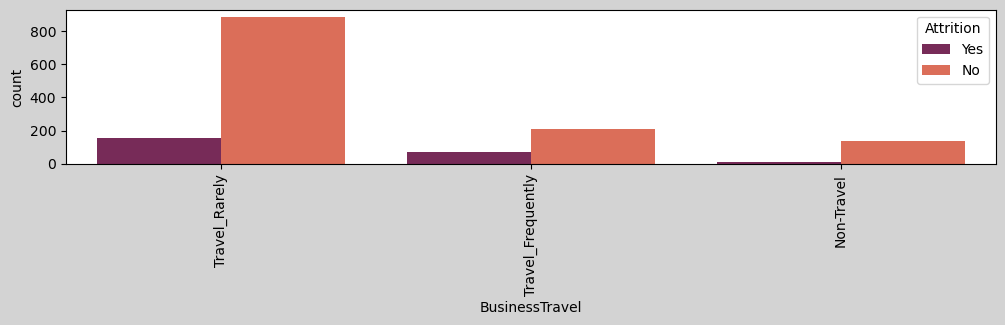

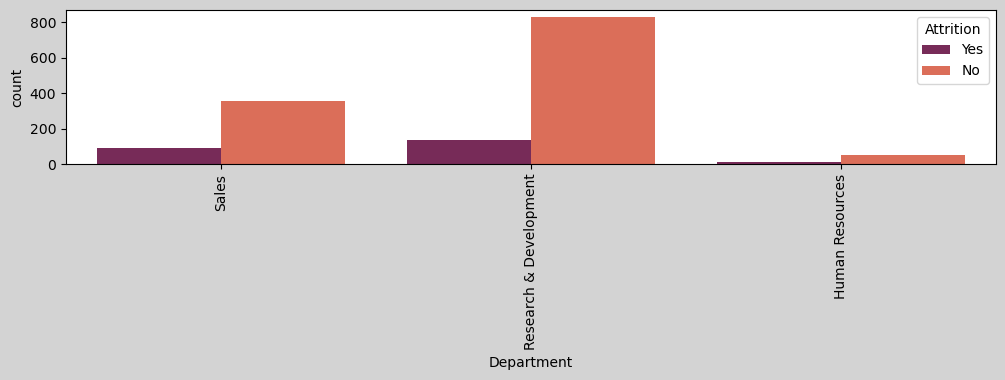

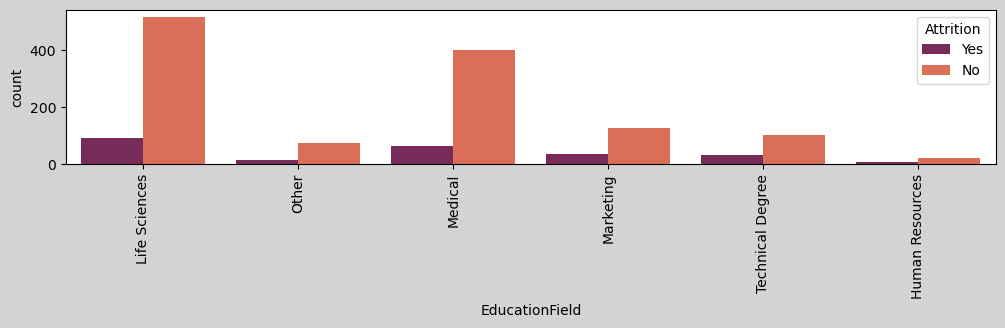

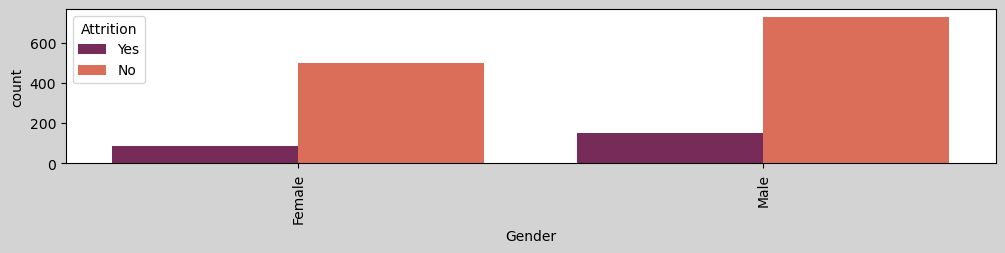

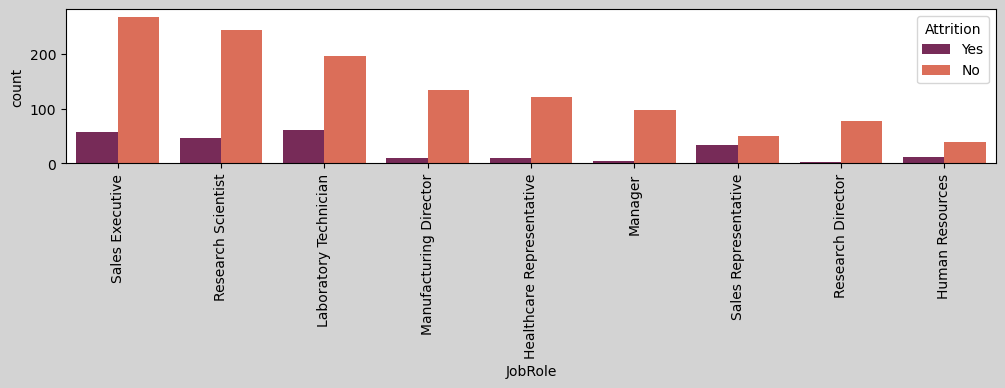

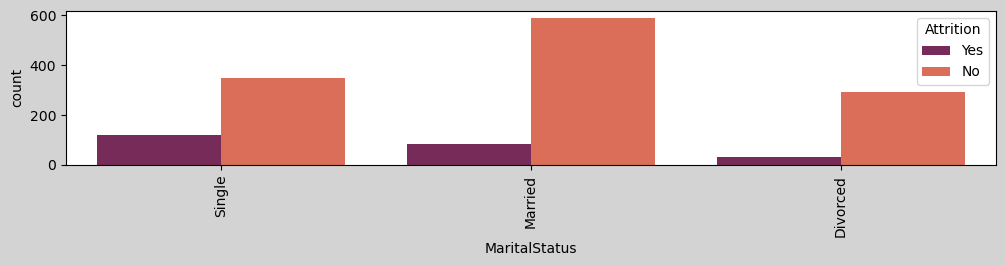

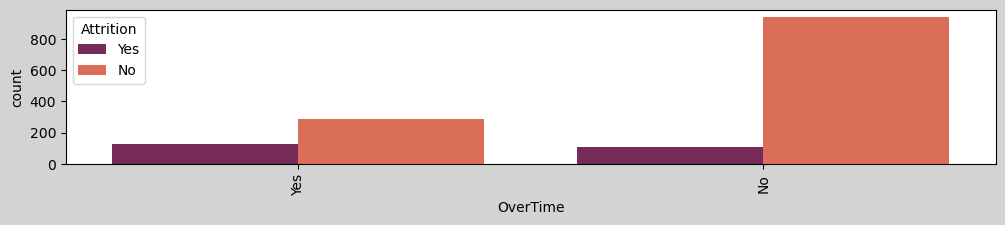

In [13]:
cat_cols=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

for i in cat_cols:
    plt.figure(figsize=(12,2),facecolor='lightgrey')
    plt.xticks(rotation=90)
    sns.countplot(x=i,data=df,hue='Attrition',palette='rocket')
    plt.show(),

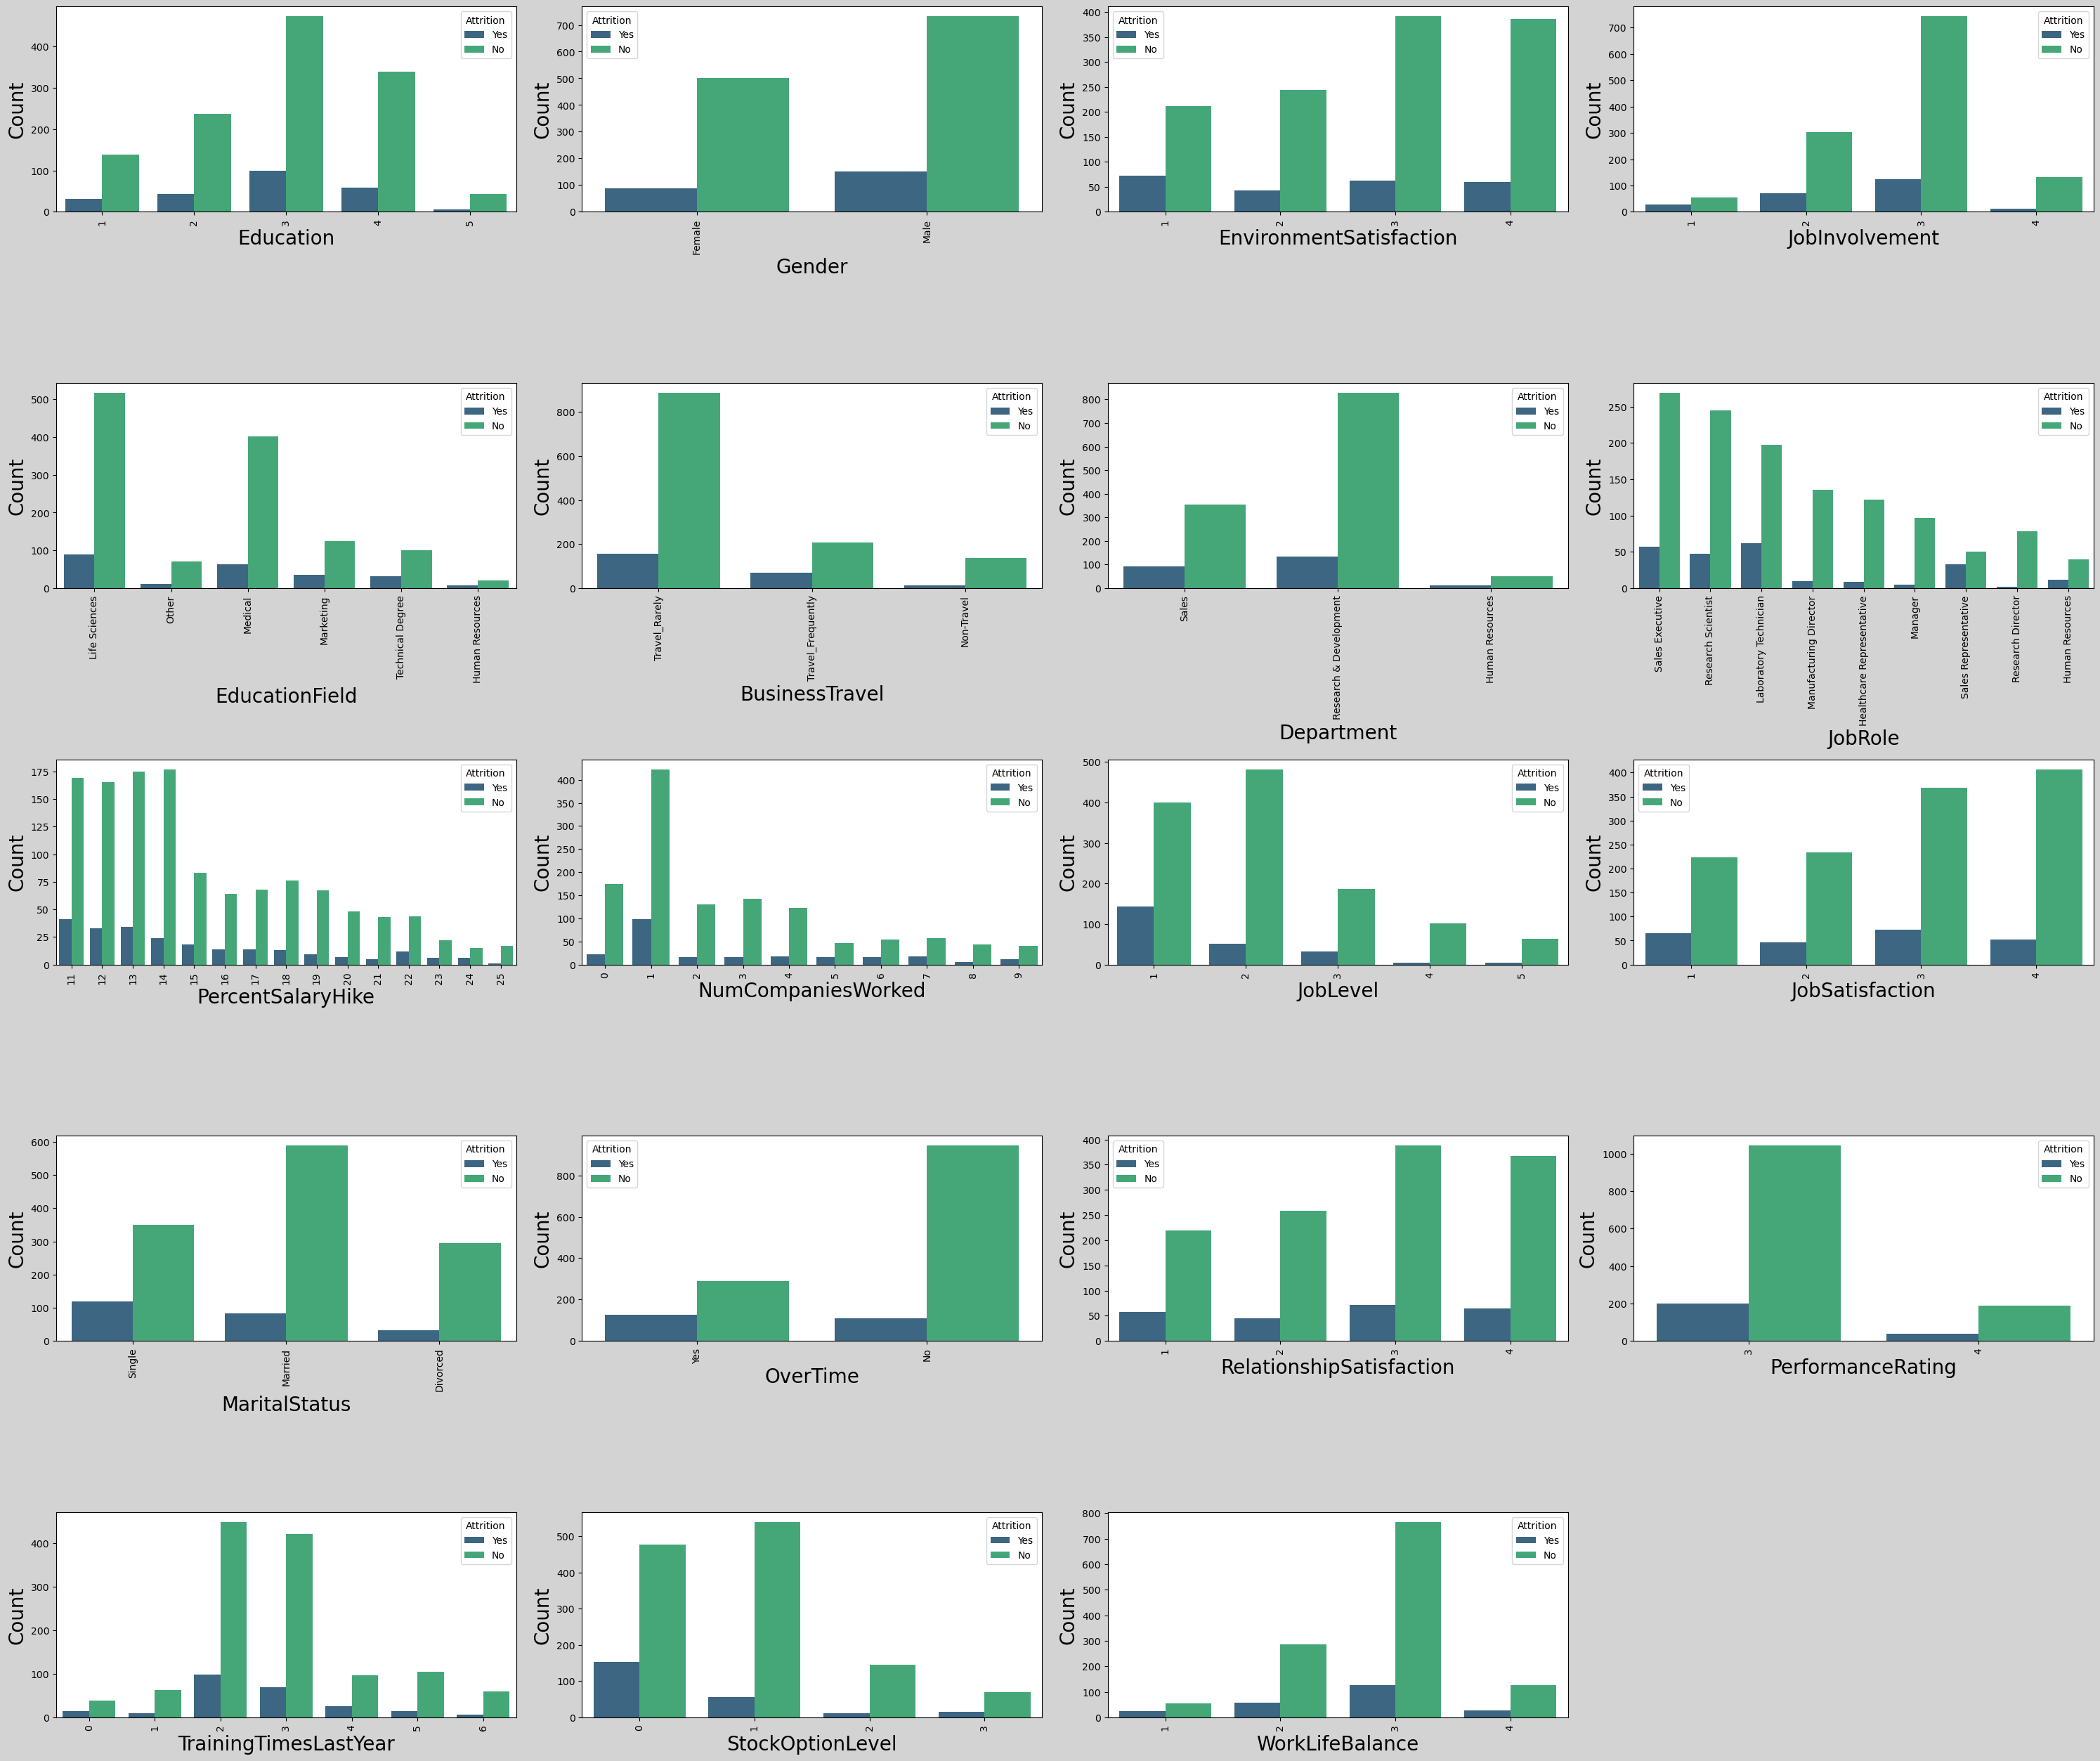

In [14]:
plt.figure(figsize=(30,30),facecolor='lightgrey')
plotnum=1

X = df[['Education','Gender','EnvironmentSatisfaction','JobInvolvement','EducationField','BusinessTravel','Department','JobRole','PercentSalaryHike','NumCompaniesWorked','JobLevel','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','PerformanceRating','TrainingTimesLastYear','StockOptionLevel','WorkLifeBalance']]
Y = df['Attrition']

for col in X:
    if plotnum<=24:
        plt.subplot(6,4,plotnum)
        sns.countplot(x = X[col],hue =Y,palette="viridis")
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
        plt.xticks(rotation = 90)
    plotnum+=1
plt.tight_layout()

In [15]:
# Checking Attrition in different departments along with different Job role to check the Attrition rate -
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True).style.background_gradient(cmap='Oranges')

# Stastical ANAlysis

In [16]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


All counts are same which shows there are no null values in all columns.
The gap between 75% pearcentile max values shows the presence of outliers

<Axes: xlabel='Gender', ylabel='DistanceFromHome'>

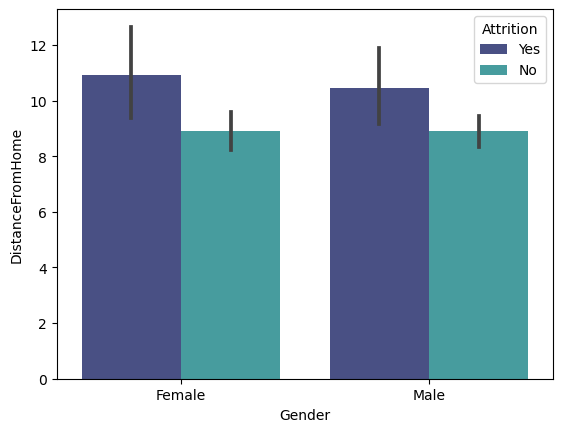

In [17]:
sns.barplot(x='Gender',y='DistanceFromHome',hue='Attrition',data=df,palette="mako") 

<Axes: xlabel='Department', ylabel='MonthlyIncome'>

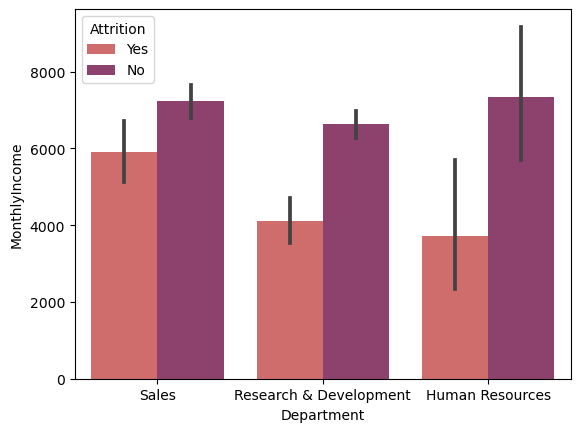

In [18]:
sns.barplot(x='Department',y='MonthlyIncome',hue='Attrition',data=df,palette='flare')

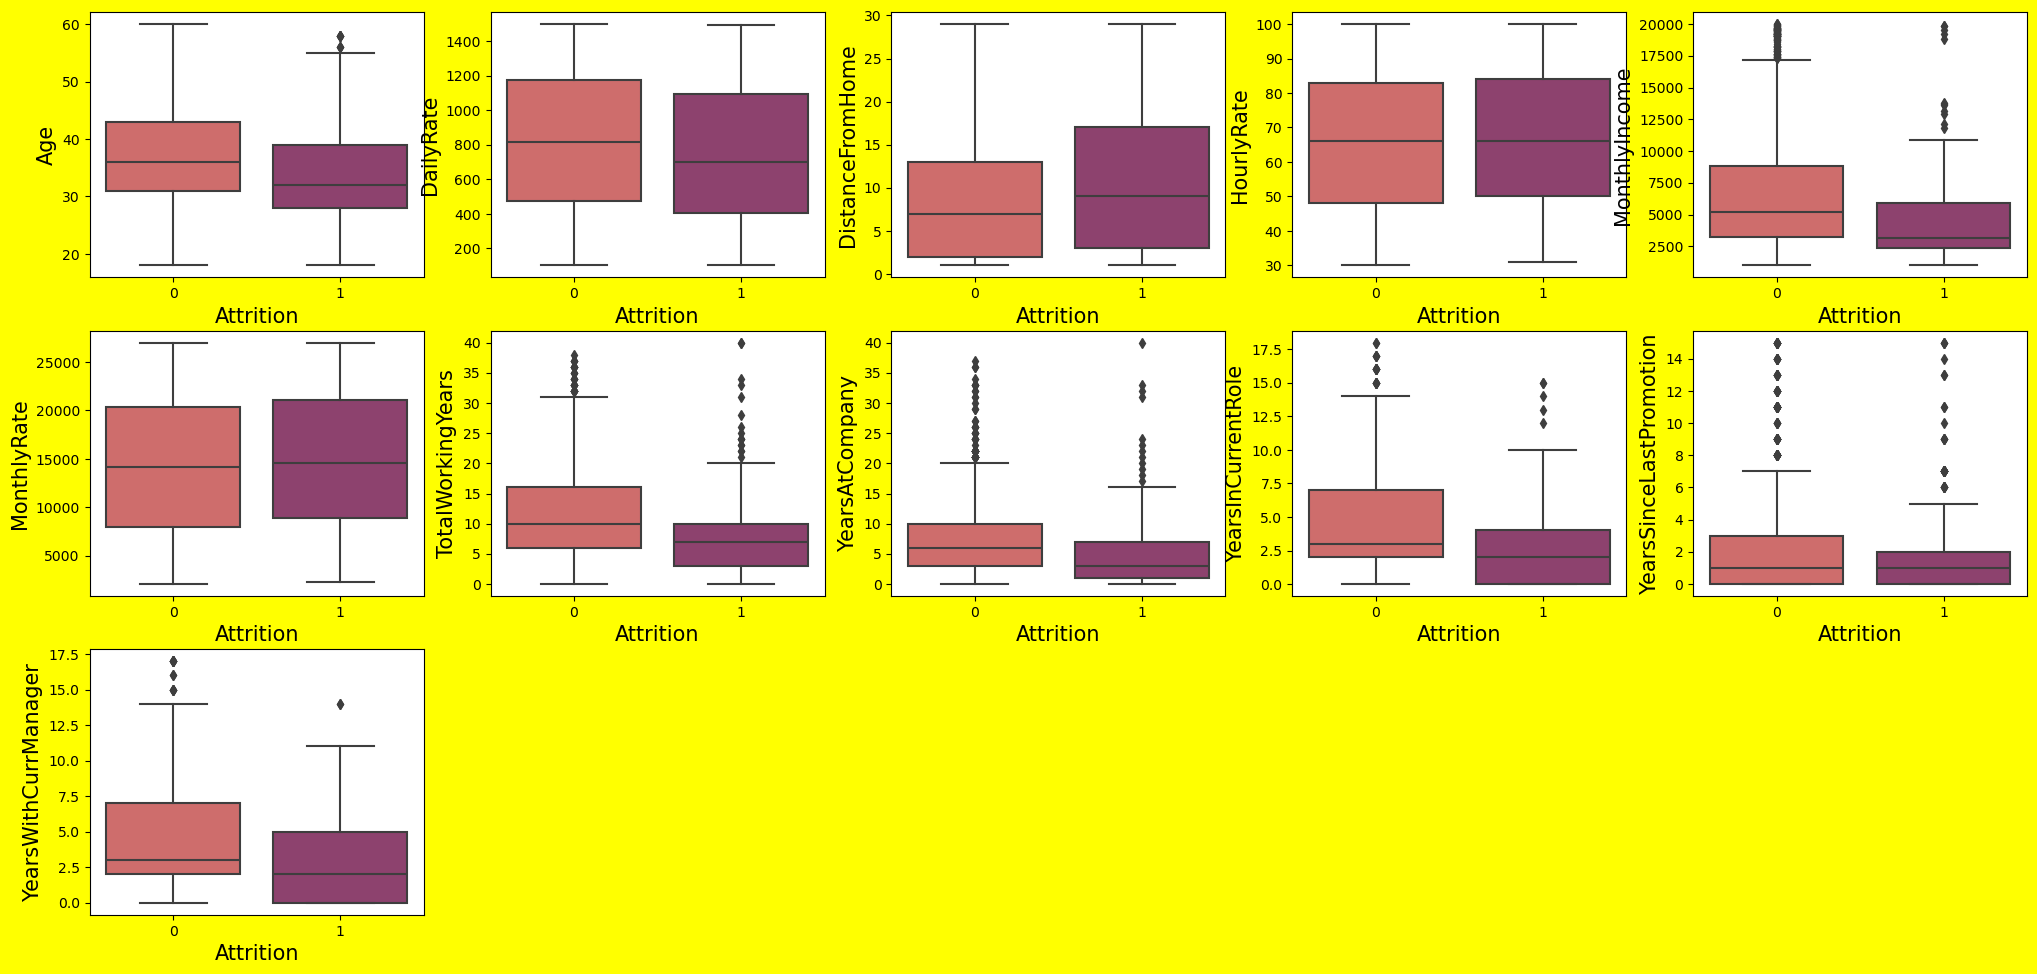

In [44]:
#checking for skewness using visualization
plt.figure(figsize=(25,20),facecolor='yellow')
plot=1


X = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
Y = df['Attrition']

for col in X:
    if plot<=15:
        plt.subplot(5,5,plot)
        sns.boxplot(x=Y,y=X[col],palette="flare")
        plt.xlabel('Attrition',fontsize=15)
        plt.ylabel(col,fontsize=15)
    plot+=1
plt.show()

Outliers are present

# Encoding

In [20]:
# encoding attrition columns.
df= df.replace({"Attrition":{"No":0, "Yes":1 }})
# encoding Bussiness Travel columns.
df= df.replace({"BusinessTravel":{"Non-Travel":1, "Travel_Frequently":2,"Travel_Rarely":3 }})
# encoding Department column.
df= df.replace({"Department":{"Human Resources":1, "Research & Development":2, "Sales":3 }})
#encoding EducationFiield columns.
df= df.replace({"EducationField":{"Human Resources":1, "Life Sciences":2, 
                                  "Marketing":3, "Medical":4,
                                  "Other":5, "Technical Degree":6 }})
#encoding Gender column
df=df.replace({'Gender':{'Male':1,'Female':0}})
#encoding of Jobrole column
df=df.replace({'JobRole':{'Sales Executive':1,'Research Scientist':2,'Laboratory Technician':3,'Manufacturing Director':4,
                          'Healthcare Representative':5,'Manager':6,'Sales Representative':7,'Research Director':8,
                         'Human Resources':9}})
#encodeing of MaritalStatus
df=df.replace({'MaritalStatus':{'Married':1,'Single':2,'Divorced':3}})#encoding of overtime column
df=df.replace({'OverTime':{'No':0,'Yes':1}})
df=df.replace({'Over18':{'Y':1}})


In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,3,1102,3,1,2,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,2,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,3,1373,2,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,2,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,3,591,2,2,1,4,1,7,...,4,80,1,6,3,3,2,2,2,2


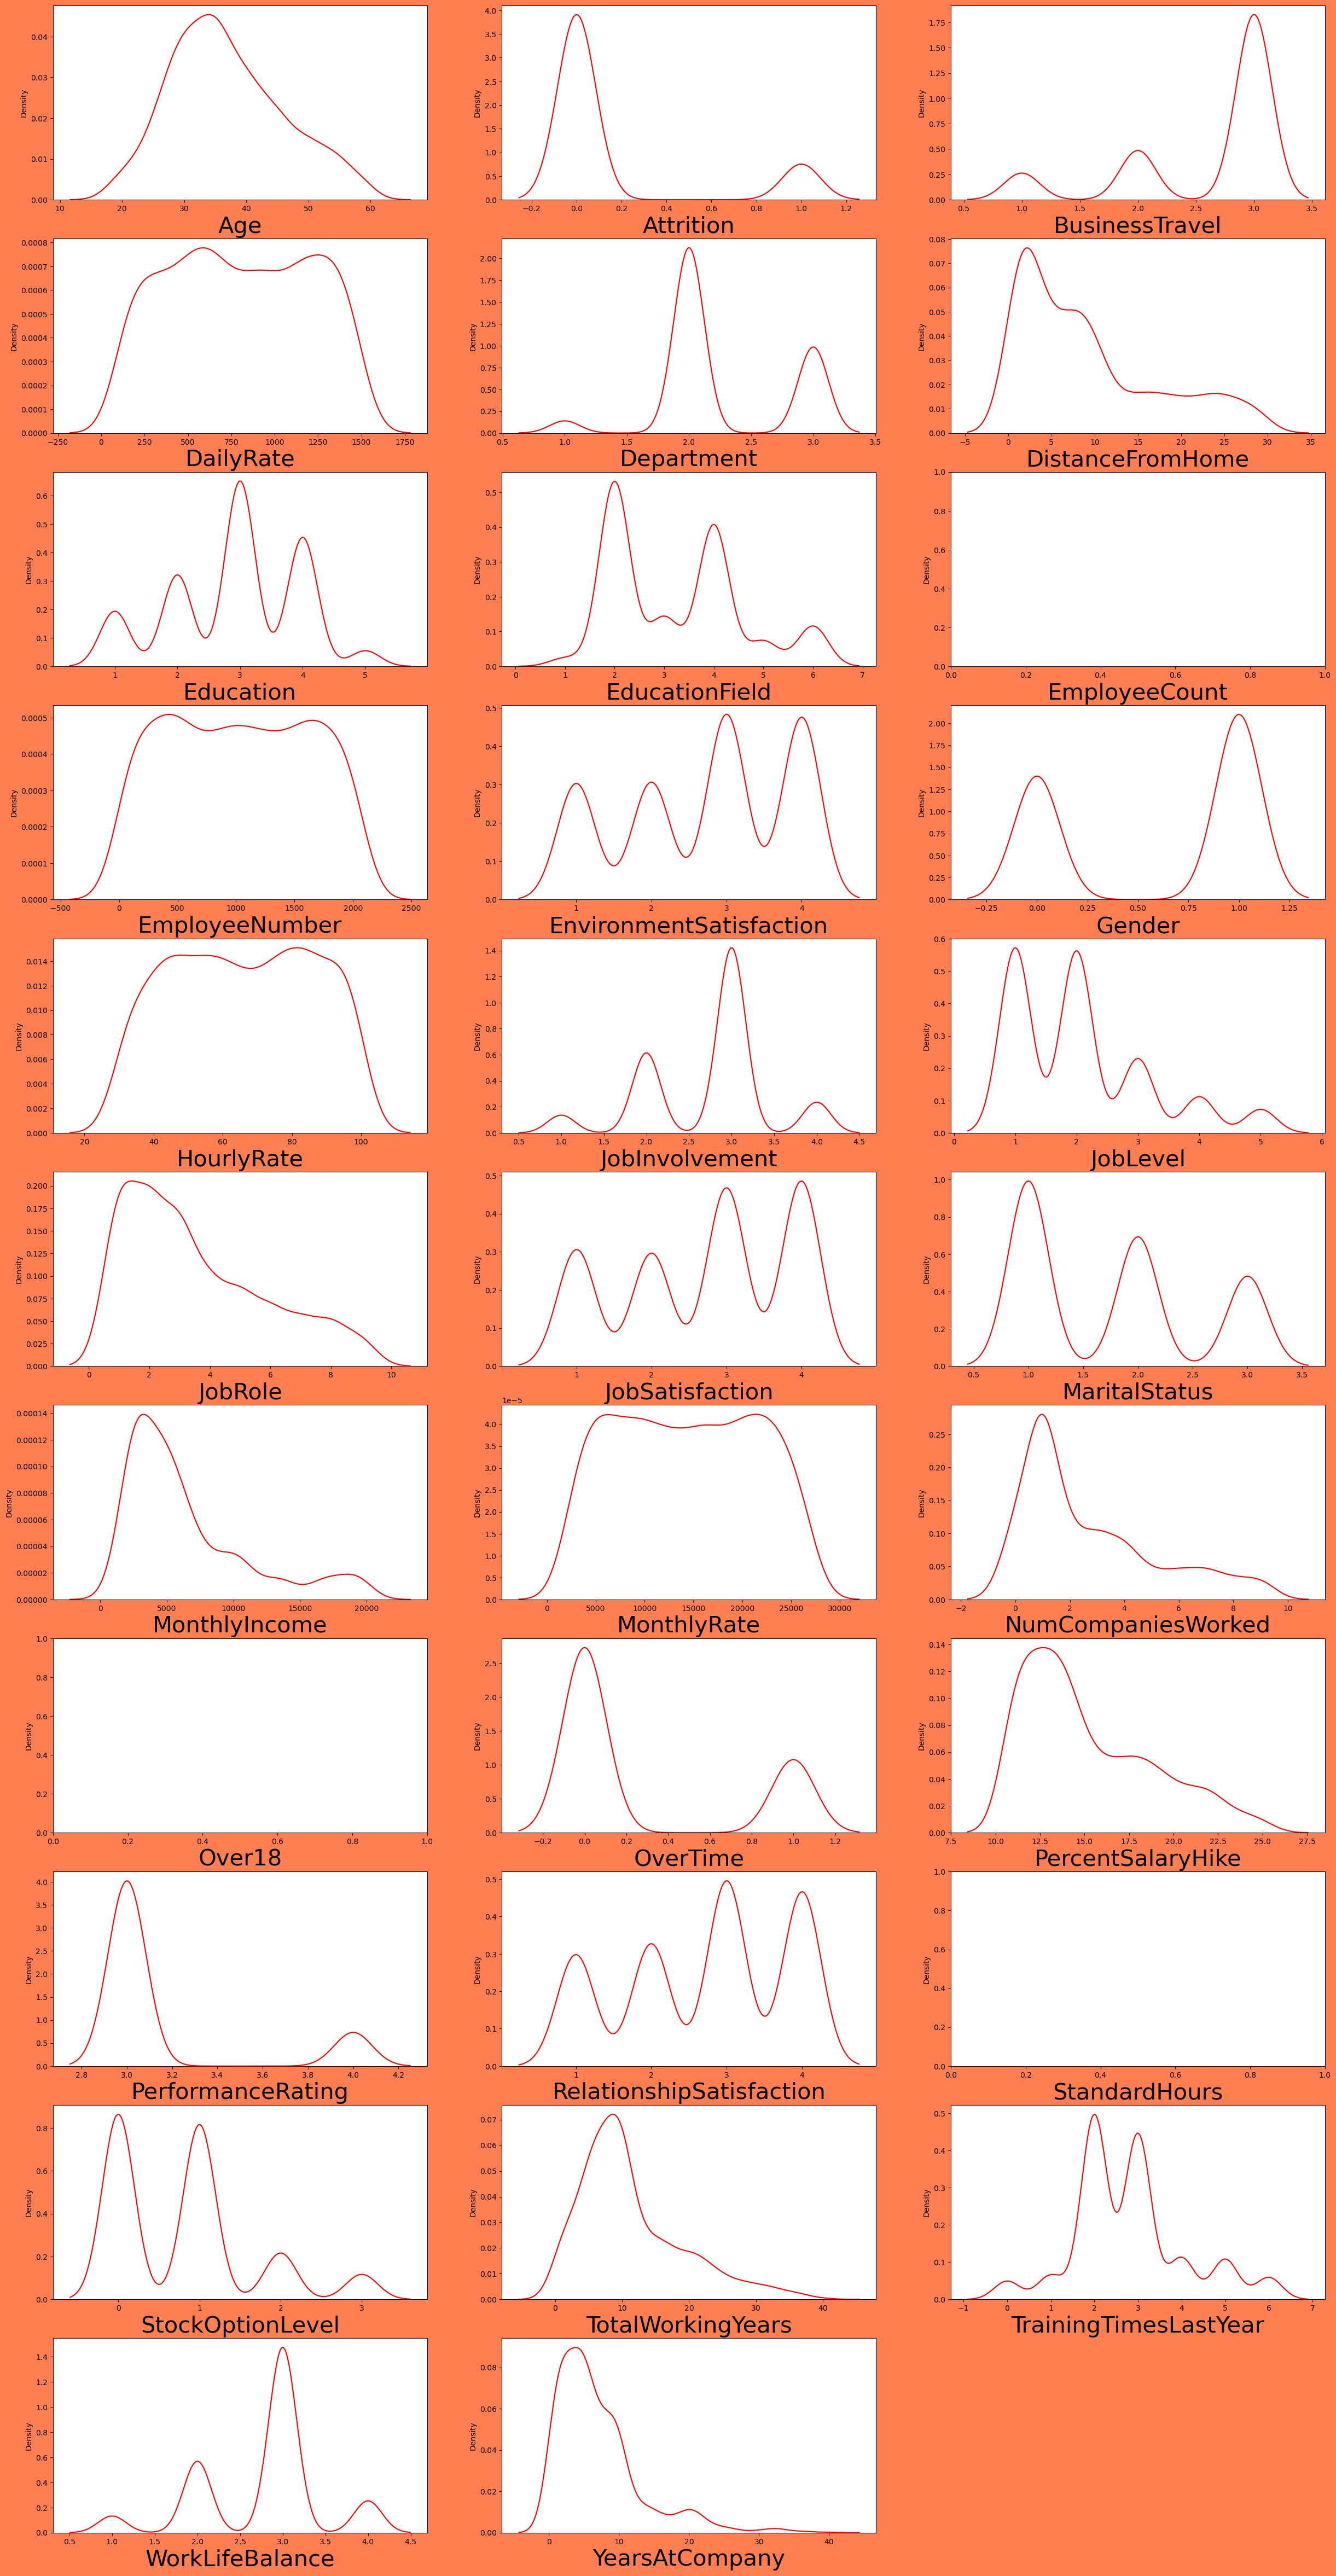

In [22]:
plt.figure(figsize=(30,60), facecolor='coral')
plotnumber=1
for column in df:
    if plotnumber <=32:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": False})
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.show()

'Attrition', 'BusinessTravel', 'DistanceFromHome', 'JobLevel', 'JobRole', 'MonthlyIncome','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager' columns are right skewed.



In [23]:
#Checking multicollinearity using Varience-inflation-factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features'] = df.columns
vif

,VIF,Features
0,2.067267,Age
1,1.272084,Attrition
2,1.020453,BusinessTravel
3,1.025119,DailyRate
4,1.389550,Department
5,1.027209,DistanceFromHome
6,1.065917,Education
7,1.017434,EducationField
8,0.000000,EmployeeCount
9,1.024717,EmployeeNumber


Comment - Here, we can see that column (EmployeeNumber,Gender,OverTime,StockOptionLevel,YearsSinceLastPromotion) have very less correlation to target variable. So we can drop it.

In [24]:
df.drop(['EmployeeCount'],axis=1,inplace=True)
df.drop(['EmployeeNumber'],axis=1,inplace=True)

In [25]:
df.drop(['StandardHours',],axis=1,inplace=True)

In [26]:
df.drop(['Over18',],axis=1,inplace=True)

# Correlation

In [27]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<Axes: >

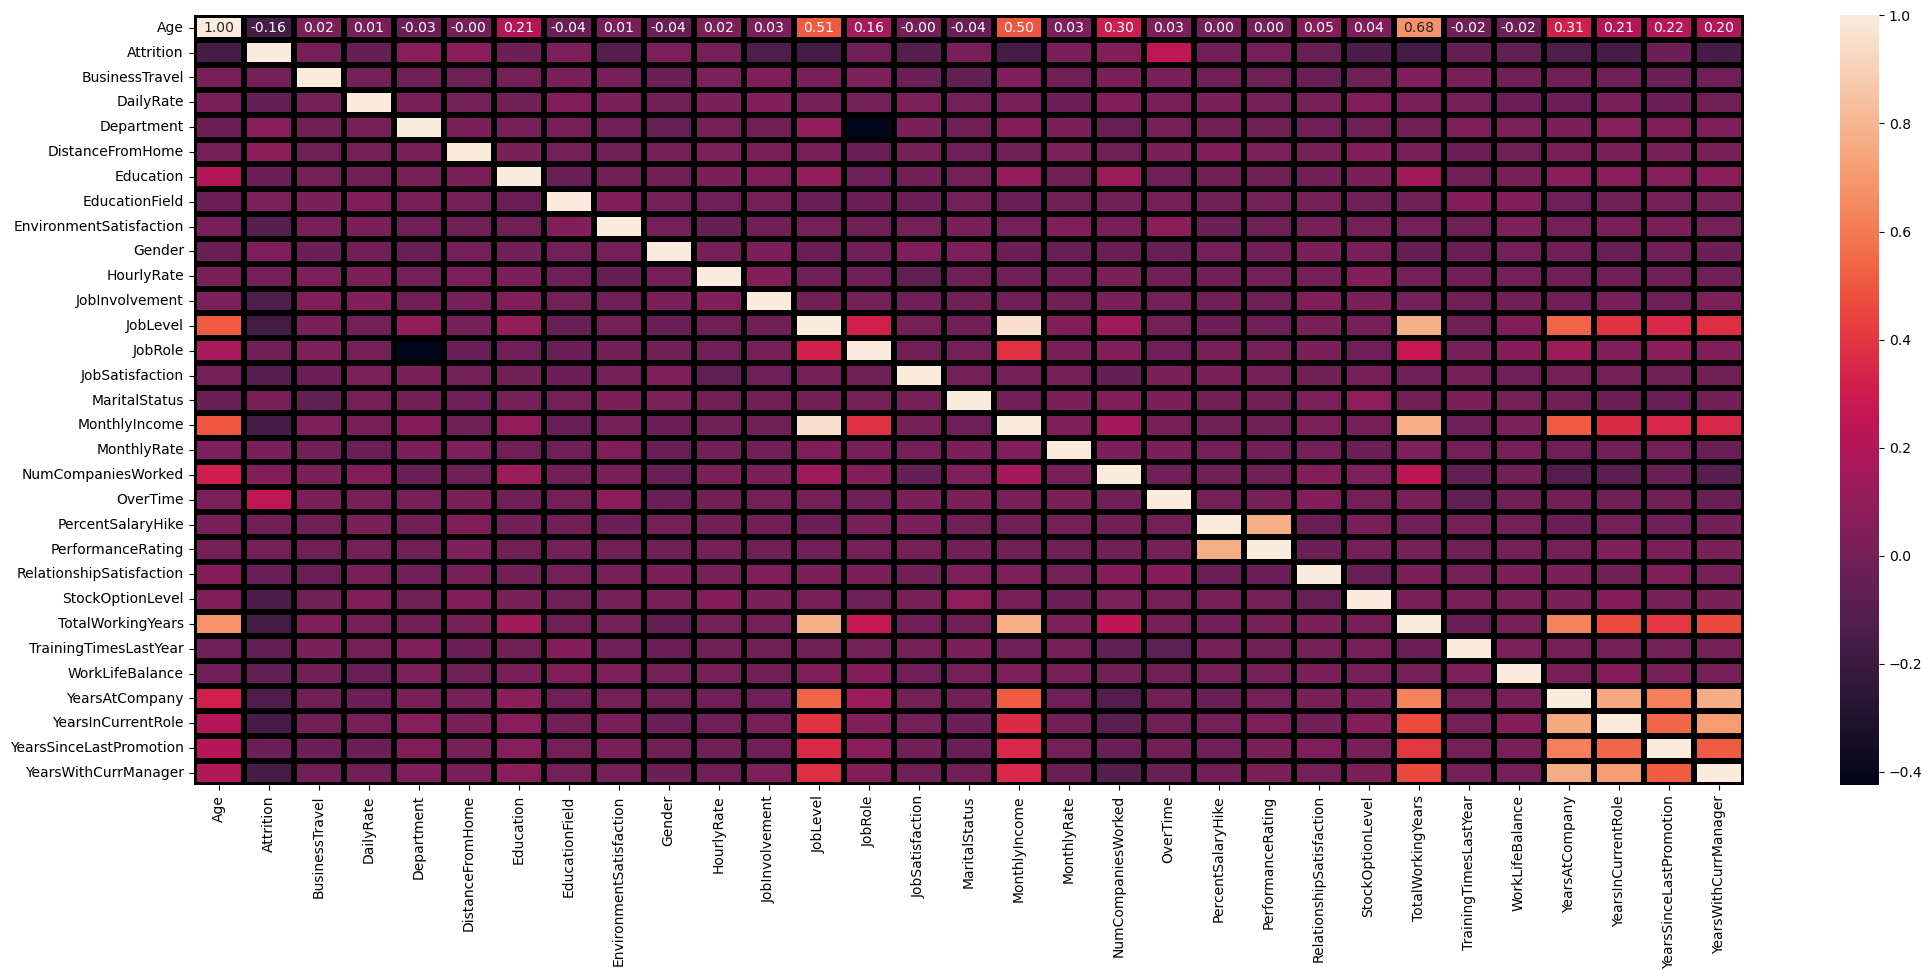

In [28]:
plt.figure(figsize=[25,10])
sns.heatmap(df.corr(),annot = True, fmt = '0.2f',linewidths=3,linecolor='black')

The column 'OverTime' is having highest positive correlation with the target variable(24.6%). The column 'TotalWorkingYears' is having highest negative correlation with the target variable(-17.1%). The column 'BusinessTravel' is having the least positive correlation with the target variable(0.0074%), while the column 'HourlyRate' is having least negative correlation with the target variable(0.69%). The columns 'OverTime',MaritalStatus','DistanceFromHome','JobRole','Department','NumCompaniesWorked','Gender','EducationField','MonthlyRate','PerformanceRating','BusinessTravel' are positively correlated to the target variable. The columns 'HourlyRate','PercentSalaryHike','Education','YearsSinceLastPromotion','RelationshipSatisfaction','DailyRate','TrainingTimesLastYear','WorkLifeBalance','EnvironmentSatisfaction','JobSatisfaction','JobInvolvement','YearsAtCompany','StockOptionLevel','YearsWithCurrentManager','Age','MonthlyIncome','YearsinceCurrentRole','JobLevel','TotalWorkingYears' are negatively correlated to the target variable.

# Removal of z score

In [29]:
from scipy.stats import zscore

z =np.abs(zscore(df))
df1 = df.loc[(z<3).all(axis=1)]
print(df1.shape)

(1387, 31)


In [30]:
print('Percentage loss of data using Z-score is :',(df.shape[0]-df1.shape[0])/df.shape[0])

Percentage loss of data using Z-score is : 0.05646258503401361


In [31]:
X=df[['Age', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole','YearsWithCurrManager']]
#Target variable
Y= df.Attrition

# Model Building

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score   
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [33]:
Model= [ DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GradientBoostingClassifier(), KNeighborsClassifier(),LogisticRegression(), AdaBoostClassifier()]

In [34]:
 X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=22)

In [35]:
print(X_train.shape,Y_train.shape)

(1176, 26) (1176,)


In [36]:
print(X_test.shape,Y_test.shape)

(294, 26) (294,)


In [37]:
for m in Model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print(m,'Evaluztion matics is :')
    print('\n')
    print('Accuracy Score :\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix :\n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('Classification Report :\n',classification_report(Y_test, y_pred))
    print('\n')

DecisionTreeClassifier() Evaluztion matics is :


Accuracy Score :
 0.7040816326530612


Confusion matrix :
 [[196  46]
 [ 41  11]]


Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       242
           1       0.19      0.21      0.20        52

    accuracy                           0.70       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.71      0.70      0.71       294



RandomForestClassifier() Evaluztion matics is :


Accuracy Score :
 0.8333333333333334


Confusion matrix :
 [[238   4]
 [ 45   7]]


Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       242
           1       0.64      0.13      0.22        52

    accuracy                           0.83       294
   macro avg       0.74      0.56      0.56       294
weighted avg       0.80      0.83      0.79       294



SVC() Evaluztion matics 

Here GradientBoostingClassifier is giving best accuracy score that is 0.833

# HyperParameter Tuning

In [38]:
params_rf = {'criterion':['gini','entropy'],
         'max_depth': [10,12,25],
         'min_samples_split' :[2,3,4],
         'min_samples_leaf' :[1,2,3]}

grid_cv = GridSearchCV(RandomForestClassifier(),param_grid = params_rf,n_jobs =-1)
grid_cv.fit(X,Y)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 25],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [39]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [40]:
grid_cv.best_score_

0.8530612244897959

In [41]:
final_model = RandomForestClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf = 2, min_samples_split= 4)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=47)
final_model.fit(x_train, y_train)
pred_test = final_model.predict(x_test)
print(f" Accuracy score is: {accuracy_score(y_test,pred_test)*100:.2f}")
print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,pred_test))
print ('\n','Classification Report:','\n',classification_report(y_test,pred_test))

 Accuracy score is: 84.01

 Confusion matrix: 
 [[242   6]
 [ 41   5]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       248
           1       0.45      0.11      0.18        46

    accuracy                           0.84       294
   macro avg       0.65      0.54      0.54       294
weighted avg       0.79      0.84      0.80       294



# Saving model

In [42]:
import joblib
joblib.dump(final_model,"HR_analytics.pkl")

['HR_analytics.pkl']

In [43]:
#Prediction using linear Regression model
Actual = np.array(y_test)
predicted = np.array(final_model.predict(x_test))
predicted_df = pd.DataFrame({'Original Value (W)':Actual,'Predicted Value (W)':predicted})
predicted_df

,Original Value (W),Predicted Value (W)
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
289,0,0
290,0,0
291,0,0
292,0,0
